# Depression Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
source_dataset = pd.read_csv('./../data/depression_analysis/depression_data.csv')
currated_dataset = source_dataset.copy()

# *Exploratory Data Analysis*

Understanding the datas distribution will be vital when determining how we sample the data. Highly imbalanced data will require stratified approach to sampling. 

1. *Distribution of Age*: *Uniformly distributed*
2. *Marital Status": Imbalanced.*
3. *Eduction Level": Imbalanced.* 
4. *Number of Children": Imbalanced*

Highly imbalanced Datasets create risk that a random sampling method will result in classes being ommited from training stage. For example the count for having 4 children is 3% of the population. Stratified splitting may be important here to include all classes

In [3]:
# 1
# sns.histplot(source_dataset['Age'], kde=True, stat="density", color="blue", alpha=0.6, edgecolor="black")
# sns.kdeplot(source_dataset['Age'], color="red", linewidth=2)

# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Density')
# plt.show()


In [4]:
from data_wrangling.data_visualization import display_features_by_count

In [5]:
# 2

# display_features_by_count(
#     dataset=source_dataset,
#     feature_name='Marital Status',
#     title='Marital Status Distribution',
#     xlabel='Marital Status')



In [6]:
# display_features_by_count(
#     dataset=source_dataset,
#     feature_name='Education Level',
#     title='Education Level Distribution',
#     xlabel='Education Level Status')

In [7]:
# display_features_by_count(
#     dataset=source_dataset,
#     feature_name='Number of Children',
#     title='Number of Children Distribution',
#     xlabel='Number of Children Status')

# *Data Wrangling*

1. *The ask is to to create a machine learning model to predict whether a given individual will have a "History of Mental Illness". This will be our y label*
2. *Drop column "Name" as it has no statistical power of the predictor*
3. *Create age ranges. Removing granularity may remove noise within the data*
4. *Replace columns with string values to integer representations. Should improve computation performance* 

In [8]:
# 1
# y_column_name = currated_dataset['History of Mental Illness'].name
# #currated_dataset = currated_dataset.replace({'Yes': 1, 'No': 0})
# y = currated_dataset[y_column_name].values
# print(type(y))

In [9]:
# 2

# Remove the 'Name' column from the dataset
# currated_dataset.drop(['Name'], axis=1, inplace=True)


In [10]:
# 3

# Define age groups and their corresponding labels
# def age_group(age):
#     if age <= 30:
#         return 0
#     elif 31 <= age <= 40:
#         return 1
#     elif 41 <= age <= 50:
#         return 2
#     elif 51 <= age <= 60:
#         return 3
#     elif 61 <= age <= 70:
#         return 4
#     elif 71 <= age <= 80:
#         return 5

# # Apply the age grouping to the dataset
# currated_dataset['Age'] = currated_dataset['Age'].apply(age_group)

In [11]:
# 4

# First, replace 'Yes' and 'No' with 1 and 0 as before
# currated_dataset = currated_dataset.replace({'Yes': 1, 'No': 0})

# # Define encoding settings
# encoding_settings = {
#     "Education Level": {"PhD": 4, "Master's Degree": 3, "Bachelor's Degree": 2, "Associate Degree": 1, "High School": 0},
#     "Marital Status": {"Married": 3, "Divorced": 2, "Widowed": 1, "Single": 0},
#     "Smoking Status": {"Non-smoker": 2, "Former": 1, "Current": 0},
#     "Physical Activity Level": {"Sedentary": 2, "Moderate": 1, "Active": 0},
#     "Employment Status": {"Employed": 1, "Unemployed": 0},
#     "Dietary Habits": {"Healthy": 2, "Unhealthy": 1, "Moderate": 0},
#     "Sleep Patterns": {"Good": 2, "Fair": 1, "Poor": 0},
#     "Alcohol Consumption": {"High": 2, "Moderate": 1, "Low": 0},
# }
    
# # Apply the encoding settings
# currated_dataset.replace(encoding_settings, inplace=True)



In [12]:
currated_dataset.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


# *Post Data Wrangling: Exploratory Data Analysis*

1. *Display Summary Statistics* 
2. *Display columns, data types & memory consumption*

In [13]:
# 1

currated_dataset.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [14]:
# 2

currated_dataset.info()
memory_usage = currated_dataset.memory_usage(deep=True).sum()
print(f"Memory usage: {memory_usage} bytes")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

# *Optimise Memory Consumption*

*Over 47 MB of memory used. Recast to int8 to reduce memory consumption*

In [15]:
# for column in currated_dataset.columns:
#     if column != "Income":
#         currated_dataset[column] = currated_dataset[column].astype('int8')

*80% Reduction in Memory*

In [16]:
# memory_usage = currated_dataset.memory_usage(deep=True).sum()
# print(f"Memory usage: {memory_usage} bytes")


# *Machine Learning*

1. *Split Data into Train/Test using Stratified KFold* 
2. *Train Model Using *
3. Random Forest 66%, XGBoost 69%

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(currated_dataset.drop(columns=['Name']), drop_first=True)

# Define the target variable and features
X = df_encoded.drop(columns=['History of Mental Illness_Yes'])
y = df_encoded['History of Mental Illness_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

#model = RandomForestClassifier(random_state=42)

model.fit(
    X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



c:\package_x\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.69


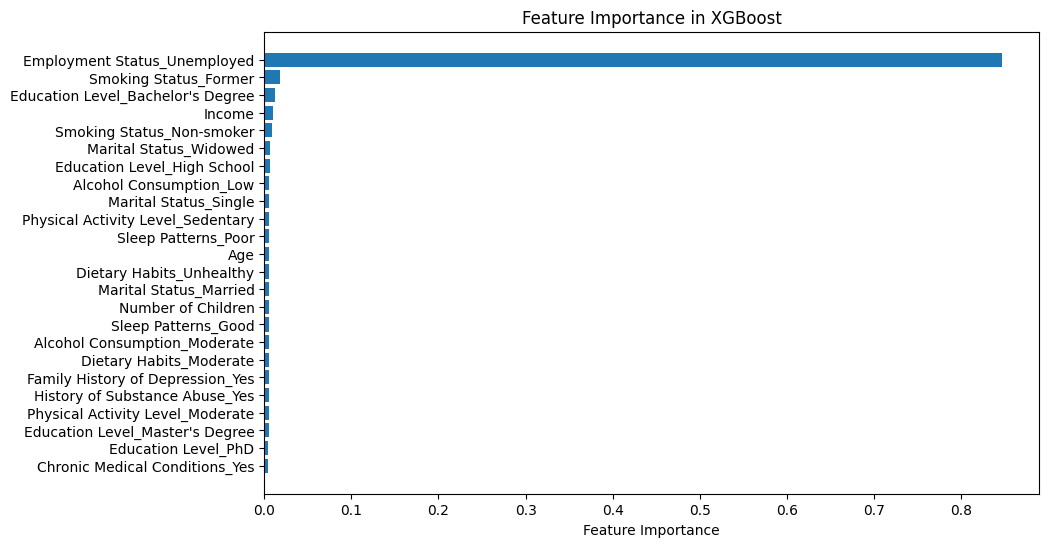

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importance
importance = model.feature_importances_
sorted_idx = np.argsort(importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost")
plt.show()

#Multcolinearity revalent here. Reduce the number of features to reduce the complexity of the model
# Cite the benefits of this 
# Improvements in the model could be achieved with feature engineering to find new features that are not correlated. 
# This could be done by creating new features from existing ones or by removing features that are not relevant to the target variable.


In [35]:
# Select top N features (e.g., top 10)
from sklearn.metrics import classification_report, accuracy_score

important_features = X.columns[np.argsort(importance)[-5:]]
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the model with reduced features
model_reduced = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model_reduced.fit(X_train_reduced, y_train)

# Evaluate the reduced model
y_pred_reduced = model_reduced.predict(X_test_reduced)
print("Accuracy with reduced features:", accuracy_score(y_test, y_pred_reduced))
print(classification_report(y_test, y_pred_reduced))


c:\package_x\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:00:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy with reduced features: 0.6953863257365203


c:\package_x\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.70      1.00      0.82     86319
        True       0.00      0.00      0.00     37812

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131



c:\package_x\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\package_x\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Create StratifiedKFold object.
from sklearn import preprocessing
from statistics import mean, stdev


# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(currated_dataset.drop(columns=['Name']), drop_first=True)

# Define the target variable and features
X = df_encoded.drop(columns=['History of Mental Illness_Yes'])
y = df_encoded['History of Mental Illness_Yes']

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=1, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
    max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
    min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
    mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [129]:
# 1
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = currated_dataset
y = y

# Loop through the StratifiedKFold splits
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Split data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y.iloc[test_index]  # Use NumPy indexing here
    
    # Initialize XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Customize hyperparameters if needed

    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Output the fold number, accuracy, and the shape of the train/test sets
    print(f"Fold {fold + 1}")
    print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
    print(f"Accuracy: {accuracy:.4f}\n")




ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Name: object, Marital Status: object, Education Level: object, Smoking Status: object, Physical Activity Level: object, Employment Status: object, Alcohol Consumption: object, Dietary Habits: object, Sleep Patterns: object, History of Mental Illness: object, History of Substance Abuse: object, Family History of Depression: object, Chronic Medical Conditions: object

In [90]:
print(y_train.shape)

(331015,)


In [91]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

model = xgb.XGBClassifier(use_label_encoder=False)  # You can customize the model hyperparameters

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


# Evaluate the model (using accuracy here, but you can use other metrics)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(len(y_pred))
for i in range(len(y_pred)):
    print(f"prediction is : {y_pred[i]} and actual is : {y_test[i]}")



c:\package_x\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
82753
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 1 and actual is : 1
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 1 and actual is : 1
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 1 and actual is : 1
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 0 and actual is : 0
prediction is : 1 and actual is : 1
prediction is : 0 and actual is : 0
prediction is : 1 and actual is : 1
prediction is : 1 and actual is : 1
prediction is : 1 and actual is : 1
prediction is : 0 and actual is : 0
prediction is : 1 and actual is : 1
prediction is : 1 and actual is : 1
predicti

In [92]:
print(type(y_pred))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [93]:
X_test.iloc[0]
y_test.iloc[0]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'